In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_jogadores= pd.read_csv('fifa21_male2.csv',sep=',',header=0,index_col = 'ID')

In [3]:
#diminuindo meu dataframe
df_jogadores = df_jogadores[["Name","Age","Position","Value","Wage","OVA","Attacking","Finishing","Heading Accuracy","Defending","Marking","Interceptions","Positioning","Total Stats","Mentality","Stamina","Short Passing","Long Passing","Team & Contract"]]
df_jogadores.head(5)

,Name,Age,Position,Value,Wage,OVA,Attacking,Finishing,Heading Accuracy,Defending,Marking,Interceptions,Positioning,Total Stats,Mentality,Stamina,Short Passing,Long Passing,Team & Contract
ID,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,LM,€625K,€7K,69,313,50,59,208,70,69.0,63.0,1929,320,69,71,69,Udinese 2008 ~ 2016
16,Luis García,37,CM CAM CDM,€600K,€7K,71,337,64,61,153,70,71.0,72.0,1906,362,64,76,71,KAS Eupen 2014 ~ 2019
27,J. Cole,33,CAM RM RW LM,€1.1M,€15K,71,337,64,41,99,35,39.0,69.0,1770,317,29,77,69,Coventry City 2016 ~ 2020
36,D. Yorke,36,NaN,€0,€0,68,264,70,60,75,34,70.0,72.0,1348,271,51,80,64,Sunderland 2009
41,Iniesta,36,CM CAM,€5.5M,€12K,81,367,69,54,181,68,70.0,78.0,2014,370,58,90,83,Vissel Kobe 2018 ~ 2021


In [4]:
#corrigindo colunas que dificultam o acesso em Pandas pq possuem espaço
df_jogadores.columns = df_jogadores.columns.str.lower().str.replace(' ', '_')

## excluindo jogadores que não estão mais em atividade ou que não possuem salário/transferência


In [5]:
df_jogadores.isnull().sum()
df_jogadores = df_jogadores.dropna()
base = df_jogadores
index_indesejados = []
for i in df_jogadores.index:
    if (df_jogadores['team_&_contract'][i].split()[-1]) == 'Free' :
        #print(i, (df_jogadores['team_&_contract'][i].split()[-1]) )
        index_indesejados.append(i)
    else:
        if (df_jogadores['team_&_contract'][i].split()[-1]) == 'Loan' :
            #print(i, (df_jogadores['team_&_contract'][i].split()[-1]) )
            index_indesejados.append(i)
        else:
            if int(df_jogadores['team_&_contract'][i].split()[-1]) <=2020:
                index_indesejados.append(i)
        

df_jogadores = df_jogadores.drop(index_indesejados)

df_jogadores.drop(columns=['team_&_contract'],axis=1,inplace =True)

## corrigindo a coluna do valor da contratação 

In [6]:
jogadores_ponto_valor = df_jogadores.loc[df_jogadores['value'].str.contains('.', regex=False)]
#a coluna value são várias string, tenho que transformar em em inteiro 
jogadores_ponto_valor.value = jogadores_ponto_valor.value.str.replace('.','')
jogadores_ponto_valor.value = jogadores_ponto_valor.value.str.lower().str.replace('€', '')
jogadores_ponto_valor.value = jogadores_ponto_valor.value.str.lower().str.replace('K', '00')
jogadores_ponto_valor.value = jogadores_ponto_valor.value.str.lower().str.replace('k', '00')
jogadores_ponto_valor.value = jogadores_ponto_valor.value.str.lower().str.replace('M', '00000')
jogadores_ponto_valor.value = jogadores_ponto_valor.value.str.lower().str.replace('m', '00000')
#mudando a toda a coluna para valores inteiros
jogadores_ponto_valor['value'] = jogadores_ponto_valor.value.str.extract(r'(\d+)', expand=True).astype(int)

## corrigindo a coluna do valor do salário 

In [7]:
salario_jogador =  df_jogadores
#a coluna value são várias string, tenho que transformar em em inteiro 
salario_jogador.wage = salario_jogador.wage.str.replace('.','')
salario_jogador.wage = salario_jogador.wage.str.lower().str.replace('€', '')
salario_jogador.wage = salario_jogador.wage.str.lower().str.replace('K', '00')
salario_jogador.wage = salario_jogador.wage.str.lower().str.replace('k', '00')
salario_jogador.wage = salario_jogador.wage.str.lower().str.replace('M', '00000')
salario_jogador.wage = salario_jogador.wage.str.lower().str.replace('m', '00000')
#mudando a toda a coluna para valores inteiros
salario_jogador['wage'] = salario_jogador.wage.str.extract(r'(\d+)', expand=True).astype(int)

In [8]:
#a coluna value são várias string, tenho que transformar em em inteiro 

df_jogadores.value = df_jogadores.value.str.lower().str.replace('€', '')
df_jogadores.value = df_jogadores.value.str.lower().str.replace('K', '000')
df_jogadores.value = df_jogadores.value.str.lower().str.replace('k', '000')
df_jogadores.value = df_jogadores.value.str.lower().str.replace('M', '000000')
df_jogadores.value = df_jogadores.value.str.lower().str.replace('m', '000000')
#mudando a toda a coluna para valores inteiros
df_jogadores['value'] = df_jogadores.value.str.extract(r'(\d+)', expand=True).astype(int)

jogadores = pd.concat([jogadores_ponto_valor,df_jogadores],sort=False)
jogadores = jogadores.drop_duplicates(['name'])
jogadores2 = pd.concat([salario_jogador,jogadores],sort=False)
jogadores2 = jogadores2.drop_duplicates(['name'])
jogadores.wage = jogadores2.wage
jogadores= jogadores.set_index("name")

condicao = jogadores.value == 0
for i in jogadores[condicao].index:
    jogadores = jogadores.drop(i)
    
condicao = jogadores.wage == 0
for i in jogadores[condicao].index:
    jogadores = jogadores.drop(i)

jogadores_resposta = jogadores.copy()

In [9]:
jogadores

,age,position,value,wage,ova,attacking,finishing,heading_accuracy,defending,marking,interceptions,positioning,total_stats,mentality,stamina,short_passing,long_passing
name,,,,,,,,,,,,,,,,,
Iniesta,36,CM CAM,5500000,1200,81,367,69,54,181,68,70.0,78.0,2014,370,58,90,83
R. Keane,35,ST,5500000,1000,80,380,84,63,71,28,34.0,85.0,1974,343,72,81,63
G. Buffon,42,GK,2200000,4100,82,95,15,13,35,13,28.0,12.0,1292,150,34,37,35
S. Gerrard,36,CM CDM,1400000,1000,81,400,76,75,196,63,69.0,78.0,2154,395,68,83,86
Quaresma,36,RM LM,4200000,1100,79,352,64,41,57,29,24.0,78.0,1928,332,57,78,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F. Tapia,19,GK,300000,200,60,67,8,16,81,50,7.0,6.0,1023,122,30,23,29
W. Rickard,18,CAM CM,130000,300,56,248,43,50,132,34,50.0,55.0,1529,259,53,64,61
C. Barrett,18,RB,130000,200,56,218,34,53,163,55,55.0,49.0,1430,256,53,42,36


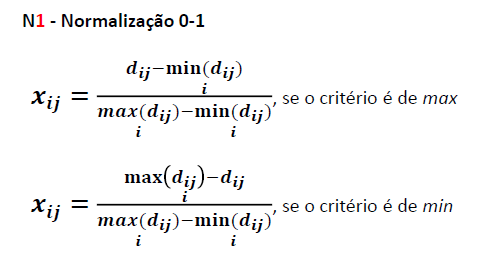

In [10]:
def NormalizaParametro01(coluna,jogadores,minimo_maximo):
    min_parametro = jogadores[coluna].min()
    max_parametro = jogadores[coluna].max()
    lista_normalizada = []
    if minimo_maximo == 'maximo':
        for i in jogadores.index:
            x=(jogadores[coluna][i]-min_parametro)/(max_parametro-min_parametro)
            lista_normalizada.append(x)
            #print("ma")
        jogadores[coluna] = lista_normalizada   
    else:
        for i in jogadores.index:
            x=(max_parametro-jogadores[coluna][i])/(max_parametro-min_parametro)
            lista_normalizada.append(x)
            #print("m")
        jogadores[coluna] = lista_normalizada
        
    return jogadores

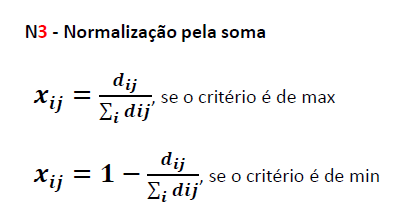


In [11]:
def NormalizaParametroSoma(coluna,jogadores,minimo_maximo):
    soma = sum(jogadores[coluna])
    lista_normalizada = []
    if minimo_maximo == 'maximo':
        for i in jogadores.index:
            x=(jogadores[coluna][i])/(soma)
            lista_normalizada.append(x)
           
        jogadores[coluna] = lista_normalizada   
    else:
        for i in jogadores.index:
            x=1-(jogadores[coluna][i])/(soma)
            lista_normalizada.append(x)
        jogadores[coluna] = lista_normalizada
        
    return jogadores

In [12]:
def Topsis(coluna,jogadores,minimo_maximo):
    soma = sum(jogadores[coluna])
    lista_normalizada = []
    if minimo_maximo == 'maximo':
        for i in jogadores.index:
            x=(jogadores[coluna][i])/math.sqrt(soma*soma)
            lista_normalizada.append(x)
           
        jogadores[coluna] = lista_normalizada   
    else:
        for i in jogadores.index:
            x=1-(jogadores[coluna][i])/math.sqrt(soma*soma)
            lista_normalizada.append(x)

        jogadores[coluna] = lista_normalizada
    
    return jogadores

# FILTRO DE VALOR DE CONTRATAÇÃO


In [13]:
jogadores.value.describe()

count    1.267900e+04
mean     2.954289e+06
std      5.974310e+06
min      3.000000e+03
25%      4.250000e+05
50%      9.000000e+05
75%      2.900000e+06
max      1.055000e+08
Name: value, dtype: float64

In [16]:
faixa1 = 4.250000e+05
faixa2 = 9.000000e+05
faixa3 = 2.900000e+06
dif = 1.055000e+08 - 2.900000e+06
dif = dif/2 + 2.900000e+06
faixa4 = dif
faixa5 = 1.055000e+08
pesos_criterios = [0.24,0.24,0.20,0.12,0.10,0.10]
# idade, nota, estatística gerais, ataque, finalização, acurácia do cabeceio,

In [17]:
def moneyball(jogadores,salario,tipo_normalização,posicao,pesos_criterios):
    condicao_trasnferencia_max = jogadores.value <= salario
    jogadores = jogadores[condicao_trasnferencia_max]
    
    ha_jogador = 0
    for i in jogadores.index:
        ha_jogador = ha_jogador + 1
    
    if ha_jogador == 0:
        print("não há jogador dessa posição com esse salário")
        sys.exit()
    
    defensores = ['RB', 'CB','LB','RWB','LWB']
    meias = ['CDM','CM','CAM','RM','LM']
    atacantes = ['RW','LW','CF','ST']

    for i in jogadores.index:
        a = (jogadores.position[i].split())
        if a[0] in defensores:
            jogadores.position[i] = 'defensor'

        else:
            if  a[0] in meias:
                jogadores.position[i] = 'meia'
            else: 
                if  a[0] in atacantes:
                    jogadores.position[i] = 'atacante'
                else:
                    jogadores.position[i] = 'gol'
    condicao = jogadores.value == 0
    for i in jogadores[condicao].index:
        jogadores = jogadores.drop(i)

    condicao = jogadores.wage == 0
    for i in jogadores[condicao].index:
        jogadores = jogadores.drop(i)

    preciso_normalizar_max = ['ova', 'attacking','finishing', 'heading_accuracy', 'defending', 'marking',
       'interceptions', 'positioning', 'total_stats', 'mentality', 'stamina','short_passing', 'long_passing']
    preciso_normalizar_min = ['age']


    if tipo_normalização == "0-1":
        for i in preciso_normalizar_max:
            jogadores= NormalizaParametro01(i,jogadores,'maximo')
        for i in preciso_normalizar_min:
            jogadores= NormalizaParametro01(i,jogadores,'minimo')
    else:
        if tipo_normalização == "soma":
            for i in preciso_normalizar_max:
                jogadores= NormalizaParametroSoma(i,jogadores,'maximo')
            for i in preciso_normalizar_min:
                jogadores= NormalizaParametroSoma(i,jogadores,'minimo')
        else: #topsis
            for i in preciso_normalizar_max:
                jogadores= Topsis(i,jogadores,'maximo')
            for i in preciso_normalizar_min:
                jogadores= Topsis(i,jogadores,'minimo')


    
    if posicao == 'defensor':

        codicao =  jogadores.position == 'defensor'
        jogadores_posicao = jogadores[codicao] 
        jogadores_posicao = jogadores_posicao[["age","ova","total_stats","defending","marking","interceptions"]]
        criterios_posicao = ["age","ova","total_stats","defending","marking","interceptions"]
        max_jogadores_posicao = jogadores_posicao.copy()
        min_jogadores_posicao = jogadores_posicao.copy()
    else:
        if posicao =='meia':
            codicao =  jogadores.position == 'meia'
            jogadores_posicao = jogadores[codicao] 
            jogadores_posicao = jogadores_posicao[["age","ova","total_stats","stamina","short_passing","long_passing"]]
            criterios_posicao = ["age","ova","total_stats","stamina","short_passing","long_passing"]
            max_jogadores_posicao = jogadores_posicao.copy()
            min_jogadores_posicao = jogadores_posicao.copy()
        else:
            
            codicao =  jogadores.position == 'atacante'
            jogadores_posicao = jogadores[codicao] 
            jogadores_posicao = jogadores_posicao[["age","ova","total_stats","attacking","finishing","heading_accuracy"]]
            criterios_posicao = ["age","ova","total_stats","attacking","finishing","heading_accuracy"]
            max_jogadores_posicao = jogadores_posicao.copy()
            min_jogadores_posicao = jogadores_posicao.copy()
    

    for i in range(len(jogadores_posicao.columns)):
        
        jogadores_posicao[jogadores_posicao.columns[i]] = jogadores_posicao[jogadores_posicao.columns[i]]*pesos_criterios[i]
        
        if tipo_normalização == "topsis":

            maximo = max(jogadores_posicao[jogadores_posicao.columns[i]])
            minimo = min(jogadores_posicao[jogadores_posicao.columns[i]])

            max_jogadores_posicao[max_jogadores_posicao.columns[i]] = np.power(( max(jogadores_posicao[jogadores_posicao.columns[i]]) - jogadores_posicao[jogadores_posicao.columns[i]]),2) 
            #print('DEPOIS',max_jogadores_posicao[max_jogadores_posicao.columns[0]])
            min_jogadores_posicao[max_jogadores_posicao.columns[i]] = np.power((jogadores_posicao[jogadores_posicao.columns[i]]- min(jogadores_posicao[jogadores_posicao.columns[i]])),2)
        

    if tipo_normalização == "topsis":
        max_jogadores_posicao['A+']=max_jogadores_posicao.loc[:,criterios_posicao].sum(axis=1)
       # print(max_jogadores_posicao)
        max_jogadores_posicao['A+'] = np.sqrt(max_jogadores_posicao['A+'])
        #print(max_jogadores_posicao)

        min_jogadores_posicao['A-']=min_jogadores_posicao.loc[:,criterios_posicao].sum(axis=1)
        #print(min_jogadores_posicao)
        min_jogadores_posicao['A-'] = np.sqrt(min_jogadores_posicao['A-'])
        #print(min_jogadores_posicao)

        jogadores_posicao['ORDEM']=min_jogadores_posicao['A-']/(min_jogadores_posicao['A-'] + max_jogadores_posicao['A+'])
        #print(jogadores_posicao)
        jogadores_posicao= jogadores_posicao.sort_values(by='ORDEM',ascending=False)
        #print(jogadores_posicao.head(5))
    else:       

        jogadores_posicao['ORDEM']=jogadores_posicao.loc[:,criterios_posicao].sum(axis=1)
        jogadores_posicao= jogadores_posicao.sort_values(by='ORDEM',ascending=False)
        #print(jogadores_posicao.head(5))
    return jogadores_posicao

In [19]:
teste = moneyball(jogadores,faixa5,'0-1',"atacante", pesos_criterios)
teste = teste.head(10)
teste

,age,ova,total_stats,attacking,finishing,heading_accuracy,ORDEM
name,,,,,,,
K. Mbappé,0.201290,0.224348,0.178458,0.111190,0.095652,0.077273,0.888211
H. Kane,0.162581,0.213913,0.181644,0.114835,0.098913,0.090909,0.862796
S. Mané,0.147097,0.224348,0.185596,0.111797,0.094565,0.089773,0.853176
L. Martínez,0.193548,0.193043,0.174379,0.104810,0.090217,0.089773,0.845771
R. Lewandowski,0.123871,0.229565,0.184576,0.115747,0.098913,0.090909,0.843581
A. Griezmann,0.139355,0.208696,0.196431,0.116354,0.092391,0.088636,0.841863
Cristiano Ronaldo,0.092903,0.234783,0.187890,0.120000,0.100000,0.096591,0.832167
E. Haaland,0.216774,0.193043,0.163161,0.095392,0.091304,0.070455,0.830130
L. Messi,0.108387,0.240000,0.189165,0.117570,0.100000,0.073864,0.828985


# Gravando planilhas em excel 

In [171]:
teste = moneyball(jogadores,faixa1,'0-1',"defensor", pesos_criterios)
teste = teste.head(10)

teste2 = moneyball(jogadores,faixa2,'0-1',"defensor", pesos_criterios)
teste2 = teste2.head(10)

teste3 = moneyball(jogadores,faixa3,'0-1',"defensor", pesos_criterios)
teste3 = teste3.head(10)

teste4 = moneyball(jogadores,faixa4,'0-1',"defensor", pesos_criterios)
teste4 = teste4.head(10)

teste5 = moneyball(jogadores,faixa5,'0-1',"defensor", pesos_criterios)
teste5 = teste5.head(10)


In [172]:
teste.head(10).to_excel (r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', sheet_name =' Faixa1_def', index = True)

In [173]:
def append_df_to_excel(filename, df, sheet_name='Sheet1', startrow=None,
                       truncate_sheet=False, 
                       **to_excel_kwargs):
    """
    Append a DataFrame [df] to existing Excel file [filename]
    into [sheet_name] Sheet.
    If [filename] doesn't exist, then this function will create it.

    Parameters:
      filename : File path or existing ExcelWriter
                 (Example: '/path/to/file.xlsx')
      df : dataframe to save to workbook
      sheet_name : Name of sheet which will contain DataFrame.
                   (default: 'Sheet1')
      startrow : upper left cell row to dump data frame.
                 Per default (startrow=None) calculate the last row
                 in the existing DF and write to the next row...
      truncate_sheet : truncate (remove and recreate) [sheet_name]
                       before writing DataFrame to Excel file
      to_excel_kwargs : arguments which will be passed to `DataFrame.to_excel()`
                        [can be dictionary]

    Returns: None
    """
    from openpyxl import load_workbook

    # ignore [engine] parameter if it was passed
    if 'engine' in to_excel_kwargs:
        to_excel_kwargs.pop('engine')

    writer = pd.ExcelWriter(filename, engine='openpyxl')

    # Python 2.x: define [FileNotFoundError] exception if it doesn't exist 
    try:
        FileNotFoundError
    except NameError:
        FileNotFoundError = IOError


    try:
        # try to open an existing workbook
        writer.book = load_workbook(filename)

        # get the last row in the existing Excel sheet
        # if it was not specified explicitly
        if startrow is None and sheet_name in writer.book.sheetnames:
            startrow = writer.book[sheet_name].max_row

        # truncate sheet
        if truncate_sheet and sheet_name in writer.book.sheetnames:
            # index of [sheet_name] sheet
            idx = writer.book.sheetnames.index(sheet_name)
            # remove [sheet_name]
            writer.book.remove(writer.book.worksheets[idx])
            # create an empty sheet [sheet_name] using old index
            writer.book.create_sheet(sheet_name, idx)

        # copy existing sheets
        writer.sheets = {ws.title:ws for ws in writer.book.worksheets}
    except FileNotFoundError:
        # file does not exist yet, we will create it
        pass

    if startrow is None:
        startrow = 0

    # write out the new sheet
    df.to_excel(writer, sheet_name, startrow=startrow, **to_excel_kwargs)

    # save the workbook
    writer.save()

In [180]:
#defesa
teste1 = moneyball(jogadores,faixa1,'topsis',"defensor", pesos_criterios)
teste1 = teste1.head(10)

teste2 = moneyball(jogadores,faixa2,'topsis',"defensor", pesos_criterios)
teste2 = teste2.head(10)

teste3 = moneyball(jogadores,faixa3,'topsis',"defensor", pesos_criterios)
teste3 = teste3.head(10)

teste4 = moneyball(jogadores,faixa4,'topsis',"defensor", pesos_criterios)
teste4 = teste4.head(10)

teste5 = moneyball(jogadores,faixa5,'topsis',"defensor", pesos_criterios)
teste5 = teste5.head(10)

#meia ---------------------
teste1_meia = moneyball(jogadores,faixa1,'topsis',"meia", pesos_criterios)
teste1_meia = teste1_meia.head(10)

teste2_meia = moneyball(jogadores,faixa2,'topsis',"meia", pesos_criterios)
teste2_meia = teste2_meia.head(10)

teste3_meia = moneyball(jogadores,faixa3,'topsis',"meia", pesos_criterios)
teste3_meia = teste3_meia.head(10)

teste4_meia = moneyball(jogadores,faixa4,'topsis',"meia", pesos_criterios)
teste4_meia = teste4_meia.head(10)

teste5_meia = moneyball(jogadores,faixa5,'topsis',"meia", pesos_criterios)
teste5_meia = teste5_meia.head(10)

#--------------------------------------------------
teste1_ataque = moneyball(jogadores,faixa1,'topsis',"atacante", pesos_criterios)
teste1_ataque = teste1_ataque.head(10)

teste2_ataque = moneyball(jogadores,faixa2,'topsis',"atacante", pesos_criterios)
teste2_ataque = teste2_ataque.head(10)

teste3_ataque = moneyball(jogadores,faixa3,'topsis',"atacante", pesos_criterios)
teste3_ataque = teste3_ataque.head(10)

teste4_ataque = moneyball(jogadores,faixa4,'topsis',"atacante", pesos_criterios)
teste4_ataque = teste4_ataque.head(10)

teste5_ataque = moneyball(jogadores,faixa5,'topsis',"atacante", pesos_criterios)
teste5_ataque = teste5_ataque.head(10)




In [181]:
#defesa
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste1, sheet_name='Faixa1_def', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste2, sheet_name='Faixa2_def', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste3, sheet_name='Faixa3_def', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste4, sheet_name='Faixa4_def', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste5, sheet_name='Faixa5_def', index=True, startrow=30)

#meia
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste1_meia, sheet_name='Faixa1_meia', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste2_meia, sheet_name='Faixa2_meia', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste3_meia, sheet_name='Faixa3_meia', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste4_meia, sheet_name='Faixa4_meia', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste5_meia, sheet_name='Faixa5_meia', index=True, startrow=30)

#ataque
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste1_ataque, sheet_name='Faixa1_ata', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste2_ataque, sheet_name='Faixa2_ata', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste3_ataque, sheet_name='Faixa3_ata', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste4_ataque, sheet_name='Faixa4_ata', index=True, startrow=30)
append_df_to_excel(r'C:\Users\GuilhermeCorrea\Desktop\Backup\Faculdade 2020\Decisão Multicretério\Projeto\imagens\0-1.xlsx', teste5_ataque, sheet_name='Faixa5_ata', index=True, startrow=30)